**MULTI CLASS CLASSIFICATION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
#Load Iris data set from Scikitlearn, no need to download it separately:

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
#Now we need to separate features set X from the target column (class label) y, and divide the data set to 80% for training, and 20% for testing:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [ ]:
#We’ll create two objects from SVM, to create two different classifiers; one with Polynomial kernel, and another one with RBF kernel:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [ ]:
#To calculate the efficiency of the two models, we’ll test the two classifiers using the test data set:

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [ ]:
#Finally, we’ll calculate the accuracy and f1 scores for SVM with Polynomial kernel:

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67


In [ ]:
#In the same way, the accuracy and f1 scores for SVM with RBF kernel:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  76.36


**NEW DATASET REGRESSION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [ ]:
df.shape

(100, 3)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose
train = train.sort_values('time_study')
test = test.sort_values('time_study')

X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']

In [ ]:
#when datasets number varies alot
from sklearn.preprocessing import StandardScaler

### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR   #SUPPORT VECTOR REGRESSION

svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

Text(0, 0.5, 'Marks')

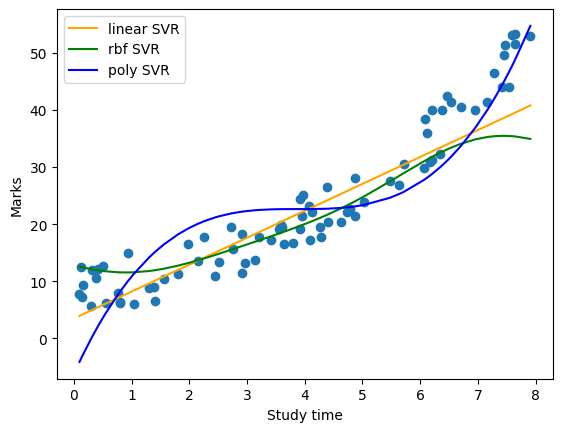

In [ ]:
from matplotlib import pyplot as plt

#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

In [ ]:
import numpy as np
from sklearn import metrics

#### Test dataset - metrics ####
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)   #r2 and rmse math
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')

r2: 0.83
rmse: 6.7


Text(0, 0.5, 'Actual')

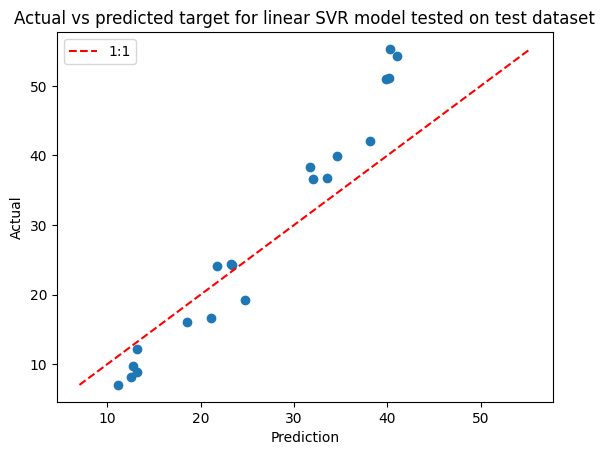

In [ ]:
#### Test dataset - plot ####
y_test_pred = svr_lin.predict(X_test_scaled)
min_axis = min(min(y_test_pred), min(y_test))
max_x = max(max(y_test_pred), max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_axis,max_x], [min_axis,max_x], 'r--', label = '1:1')
plt.legend()
plt.title('Actual vs predicted target for linear SVR model tested on test dataset')
plt.xlabel('Prediction')
plt.ylabel('Actual')